# Monte-Carlo Simulation of Investment Portfolio

### 1. Install specific library to get the stock price data

In [132]:
#pip install yfinance plotly

In [133]:
#pip install mpld3

### 2. Import libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

## I - Load historical stock price data (dividend included)

In [135]:
ticker_list = ['RI.PA', 'SU.PA', 'OR.PA', 'AI.PA', 'MC.PA', 'CAP.PA', 'BN.PA', 'AC.PA', 'SW.PA', 'TTE.PA',  'XWD.TO', '^FCHI', '^GSPC', '^SP500TR', 'LYYA.F', 'GC=F']
data_ticker = yf.download(ticker_list, start='2023-01-01', end='2024-05-31')['Close']
data_ticker.tail(10)

[*********************100%***********************]  16 of 16 completed


AC.PA       AI.PA      BN.PA      CAP.PA         GC=F  \
Date                                                                    
2024-05-17  41.369999  185.639999  59.939999  207.399994  2412.199951   
2024-05-20  41.599998  185.479996  59.939999  208.100006  2433.899902   
2024-05-21  40.880001  184.660004  60.000000  209.600006  2421.699951   
2024-05-22  40.900002  182.800003  59.759998  207.600006  2389.199951   
2024-05-23  40.900002  181.720001  59.240002  213.300003  2335.000000   
2024-05-24  40.650002  182.240005  59.180000  213.000000  2332.500000   
2024-05-27  40.840000  183.679993  59.279999  213.899994          NaN   
2024-05-28  40.639999  181.539993  58.779999  210.100006  2355.199951   
2024-05-29  39.759998  179.160004  58.520000  203.199997  2340.300049   
2024-05-30  40.270000  180.419998  58.860001  194.300003  2342.899902   

                LYYA.F       MC.PA       OR.PA       RI.PA       SU.PA  \
Date                                                                     
2024-05-17  318.380005  783.200012  447.600006  148.750000  229.149994   
2024-05-20  319.619995  779.099976  448.899994  147.750000  232.000000   
2024-05-21  319.690002  768.099976  447.549988  144.850006  231.250000   
2024-05-22  319.329987  751.900024  453.399994  144.199997  233.050003   
2024-05-23  318.799988  752.799988  450.950012  142.199997  235.750000   
2024-05-24  318.890015  750.000000  447.350006  141.000000  238.199997   
2024-05-27  319.589996  756.200012  449.350006  141.300003  237.649994   
2024-05-28  318.309998  745.400024  445.649994  139.300003  232.699997   
2024-05-29  317.170013  724.200012  440.299988  135.850006  227.350006   
2024-05-30  316.540009  734.400024  444.700012  137.000000  228.649994   

                SW.PA     TTE.PA     XWD.TO        ^FCHI        ^GSPC  \
Date                                                                    
2024-05-17  85.800003  66.949997  86.099998  8167.500000  5303.270020   
2024-05-20  85.750000  67.000000        NaN  8195.969727  5308.129883   
2024-05-21  85.300003  66.400002  86.580002  8141.459961  5321.410156   
2024-05-22  86.099998  65.169998  86.300003  8092.109863  5307.009766   
2024-05-23  86.099998  65.699997  86.139999  8102.330078  5267.839844   
2024-05-24  85.349998  65.989998  86.239998  8094.970215  5304.720215   
2024-05-27  86.050003  66.400002  86.489998  8132.490234          NaN   
2024-05-28  85.550003  66.139999  86.110001  8057.799805  5306.040039   
2024-05-29  85.250000  65.629997  85.769997  7935.029785  5266.950195   
2024-05-30  85.449997  65.309998  85.430000  7978.509766  5235.479980   

                ^SP500TR  
Date                      
2024-05-17  11546.280273  
2024-05-20  11557.839844  
2024-05-21  11587.049805  
2024-05-22  11555.839844  
2024-05-23  11470.980469  
2024-05-24  11551.559570  
2024-05-27           NaN  
2024-05-28  11554.450195  
2024-05-29  11469.459961  
2024-05-30  11402.099609

In [136]:
stocks = ['RI.PA', 'SU.PA', 'OR.PA', 'AI.PA', 'MC.PA', 'CAP.PA', 'BN.PA', 'AC.PA', 'SW.PA', 'TTE.PA']
data = data_ticker[stocks]
data.tail(10)

RI.PA       SU.PA       OR.PA       AI.PA       MC.PA  \
Date                                                                     
2024-05-17  148.750000  229.149994  447.600006  185.639999  783.200012   
2024-05-20  147.750000  232.000000  448.899994  185.479996  779.099976   
2024-05-21  144.850006  231.250000  447.549988  184.660004  768.099976   
2024-05-22  144.199997  233.050003  453.399994  182.800003  751.900024   
2024-05-23  142.199997  235.750000  450.950012  181.720001  752.799988   
2024-05-24  141.000000  238.199997  447.350006  182.240005  750.000000   
2024-05-27  141.300003  237.649994  449.350006  183.679993  756.200012   
2024-05-28  139.300003  232.699997  445.649994  181.539993  745.400024   
2024-05-29  135.850006  227.350006  440.299988  179.160004  724.200012   
2024-05-30  137.000000  228.649994  444.700012  180.419998  734.400024   

                CAP.PA      BN.PA      AC.PA      SW.PA     TTE.PA  
Date                                                                
2024-05-17  207.399994  59.939999  41.369999  85.800003  66.949997  
2024-05-20  208.100006  59.939999  41.599998  85.750000  67.000000  
2024-05-21  209.600006  60.000000  40.880001  85.300003  66.400002  
2024-05-22  207.600006  59.759998  40.900002  86.099998  65.169998  
2024-05-23  213.300003  59.240002  40.900002  86.099998  65.699997  
2024-05-24  213.000000  59.180000  40.650002  85.349998  65.989998  
2024-05-27  213.899994  59.279999  40.840000  86.050003  66.400002  
2024-05-28  210.100006  58.779999  40.639999  85.550003  66.139999  
2024-05-29  203.199997  58.520000  39.759998  85.250000  65.629997  
2024-05-30  194.300003  58.860001  40.270000  85.449997  65.309998

## Non-trading days

In [137]:
# Forward fill missing data for all tickers to handle NaN values due to non-trading days
data_filled = data.fillna(method='ffill')

## Daily change

In [138]:
returns_ticker = data_filled.pct_change().fillna(0)
#returns_ticker[abs(returns_ticker['Close']['OR.PA']- returns_ticker['Adj Close']['OR.PA']) > 0.000001]
returns_ticker

RI.PA     SU.PA     OR.PA     AI.PA     MC.PA    CAP.PA  \
Date                                                                     
2023-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-01-03 -0.002434  0.008739  0.003856 -0.002518  0.012534  0.006620   
2023-01-04  0.010572  0.044063  0.052453  0.026882  0.050085  0.022863   
2023-01-05 -0.011266 -0.001288 -0.005896 -0.004918 -0.013008  0.002449   
2023-01-06  0.010852  0.016330  0.012851  0.026744  0.028007  0.011912   
...              ...       ...       ...       ...       ...       ...   
2024-05-24 -0.008439  0.010392 -0.007983  0.002862 -0.003719 -0.001406   
2024-05-27  0.002128 -0.002309  0.004471  0.007902  0.008267  0.004225   
2024-05-28 -0.014154 -0.020829 -0.008234 -0.011651 -0.014282 -0.017765   
2024-05-29 -0.024767 -0.022991 -0.012005 -0.013110 -0.028441 -0.032842   
2024-05-30  0.008465  0.005718  0.009993  0.007033  0.014085 -0.043799   

               BN.PA     AC.PA     SW.PA    TTE.PA  
Date                                                
2023-01-02  0.000000  0.000000  0.000000  0.000000  
2023-01-03  0.007564  0.000420  0.005757 -0.017328  
2023-01-04  0.009308  0.027696 -0.000220 -0.023398  
2023-01-05  0.002975  0.020416 -0.004845  0.005903  
2023-01-06 -0.018291  0.022409 -0.011950  0.012772  
...              ...       ...       ...       ...  
2024-05-24 -0.001013 -0.006112 -0.008711  0.004414  
2024-05-27  0.001690  0.004674  0.008202  0.006213  
2024-05-28 -0.008435 -0.004897 -0.005811 -0.003916  
2024-05-29 -0.004423 -0.021654 -0.003507 -0.007711  
2024-05-30  0.005810  0.012827  0.002346 -0.004876  

[365 rows x 10 columns]

### Portfolio cumulative return

In [139]:
# Chosen weights for the portfolio
chosen_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Calculate daily portfolio returns
portfolio_returns = returns_ticker.dot(chosen_weights)

# Calculate cumulative returns for the chosen portfolio
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Convert to a DataFrame for plotting
cumulative_returns_df = cumulative_returns.reset_index()
cumulative_returns_df.columns = ['Date', 'Cumulative Returns']

## Initial weights

In [140]:
# Initial weights
chosen_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

## Portfolio cumulative return

In [141]:
# Calculate daily portfolio returns
portfolio_returns = returns_ticker.dot(chosen_weights)

# Calculate the daily portfolio value
initial_portfolio_value = 1
portfolio_value = initial_portfolio_value * (1 + portfolio_returns).cumprod()-1
#portfolio_value *= 100

In [142]:
# Convert to a DataFrame for plotting
portfolio_value_df = portfolio_value.reset_index()
portfolio_value_df.columns = ['Date', 'Portfolio Cumulative Returns']

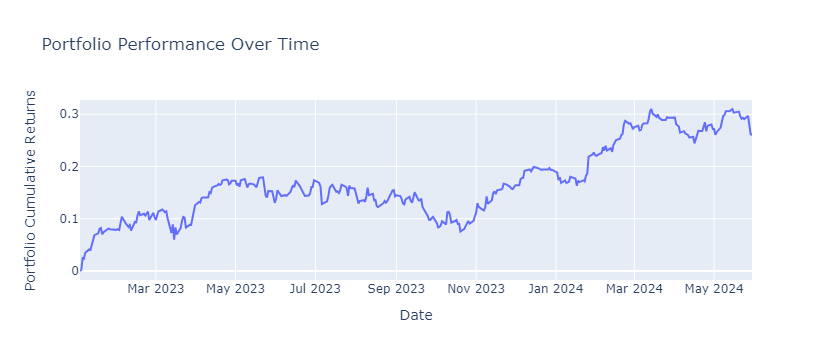

In [143]:
# Plot the performance of the portfolio over time
fig = px.line(portfolio_value_df, x='Date', y='Portfolio Cumulative Returns', title='Portfolio Performance Over Time')
fig.show()

# Monte-Carlo simulation

In [144]:
data_filled = data.fillna(method='ffill')

returns_ticker = data_filled.pct_change().fillna(0)

# Number of Monte Carlo simulations
num_simulations = 100
num_days = len(returns_ticker)

# Initialize an array to store cumulative returns for each simulation
simulated_cumulative_returns = np.zeros((num_days, num_simulations))

# Perform Monte Carlo simulations
for i in range(num_simulations):
    # Generate random daily returns based on normal distribution for each stock
    random_returns = np.random.normal(loc=returns_ticker.mean(), scale=returns_ticker.std(), size=(num_days, len(stocks)))
    
    # Calculate portfolio returns for each day in the simulation
    portfolio_simulated_returns = np.dot(random_returns, chosen_weights)
    
    # Calculate cumulative returns for the current simulation
    simulated_returns = (1 + portfolio_simulated_returns).cumprod() - 1
    
    # Store the cumulative returns for this simulation
    simulated_cumulative_returns[:, i] = simulated_returns #*100


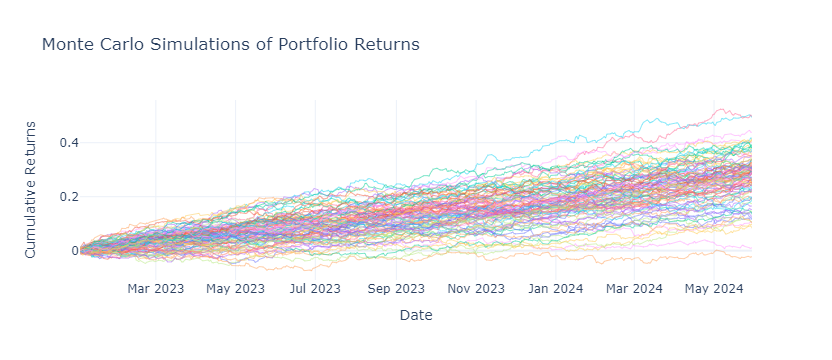

In [145]:
# Create a DataFrame to hold all simulations for plotting
simulated_df = pd.DataFrame(simulated_cumulative_returns, index=returns_ticker.index)

# Plot all simulations
fig = go.Figure()

for i in range(num_simulations):
    fig.add_trace(go.Scatter(x=simulated_df.index, y=simulated_df.iloc[:, i], mode='lines', line=dict(width=0.5), name=f'Simulation {i+1}', showlegend=False))

# Add titles and labels
fig.update_layout(title='Monte Carlo Simulations of Portfolio Returns',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Returns',
                  template='plotly_white')

# Show the plot
fig.show()

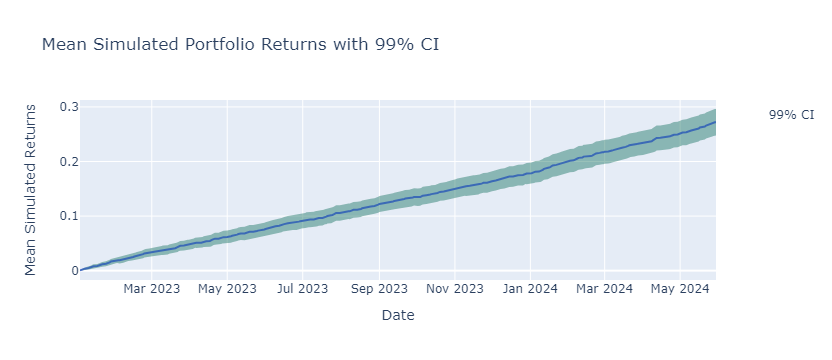

In [146]:
# Calculate the mean and standard deviation of simulated cumulative returns
mean_simulated_returns = simulated_cumulative_returns.mean(axis=1)
std_simulated_returns = simulated_cumulative_returns.std(axis=1)

# Convert to DataFrame for plotting
simulated_returns_df = pd.DataFrame({
    'Date': returns_ticker.index,
    'Mean Simulated Returns': mean_simulated_returns,
    'Upper Bound': mean_simulated_returns + 2.57 * std_simulated_returns / np.sqrt(num_simulations),
    'Lower Bound': mean_simulated_returns - 2.57 * std_simulated_returns / np.sqrt(num_simulations)
})

# Plot the mean simulated returns with confidence intervals
fig = px.line(simulated_returns_df, x='Date', y='Mean Simulated Returns', title='Mean Simulated Portfolio Returns with 99% CI')

# Add the confidence interval as a shaded area
fig.add_scatter(x=simulated_returns_df['Date'], y=simulated_returns_df['Upper Bound'], mode='lines', line=dict(width=0), fillcolor='rgba(0,100,80,0.4)', name='99% CI')
fig.add_scatter(x=simulated_returns_df['Date'], y=simulated_returns_df['Lower Bound'], mode='lines', line=dict(width=0), fill='tonexty', fillcolor='rgba(0,100,80,0.4)', showlegend=False)

# Show the plot
fig.show()

# Daily Value at Risk (VaR)

#### VaR is a measure of the risk of loss for investments, and is used to quantify market risk.

In [147]:
# Calculate the VaR at a 95% confidence level
confidence_level = 0.95
VaR_95 = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

print(f'Value at Risk (95% confidence level): {VaR_95:.2%}')

Value at Risk (95% confidence level): -1.19%


## Histogram of losses

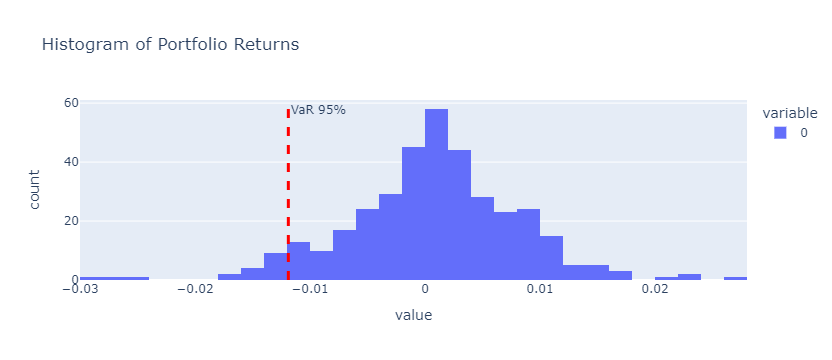

In [148]:
# Plot histogram of portfolio returns
fig = px.histogram(portfolio_returns, nbins=50, title='Histogram of Portfolio Returns')
fig.add_vline(x=VaR_95, line_width=3, line_dash="dash", line_color="red", annotation_text="VaR 95%", annotation_position="top right")

fig.show()

## Historical VaR

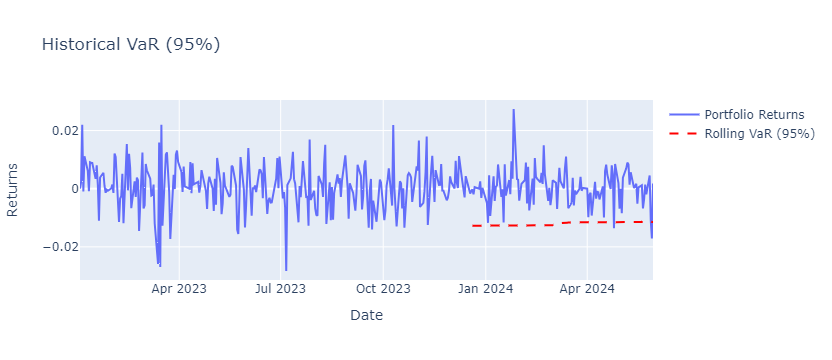

In [149]:
# Calculate rolling VaR
rolling_window = 252  # 1 year
rolling_VaR_95 = portfolio_returns.rolling(rolling_window).apply(lambda x: np.percentile(x, (1 - confidence_level) * 100))

# Plot historical VaR
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_returns.index, y=portfolio_returns, mode='lines', name='Portfolio Returns'))
fig.add_trace(go.Scatter(x=rolling_VaR_95.index, y=rolling_VaR_95, mode='lines', name='Rolling VaR (95%)', line=dict(color='red', dash='dash')))

fig.update_layout(title='Historical VaR (95%)', xaxis_title='Date', yaxis_title='Returns')
fig.show()


Portfolio return lines: The main curve shows the portfolio's daily returns.

Red line (Rolling VaR 95%): This line shows the VaR calculated on a rolling basis (for example, over a period of 252 days or one year).

Usage:

Risk evolution: By following the rolling VaR line, you can see how your portfolio's risk has changed over time.

Stress points: Periods when returns fall below VaR are times when the portfolio has suffered greater losses than expected.

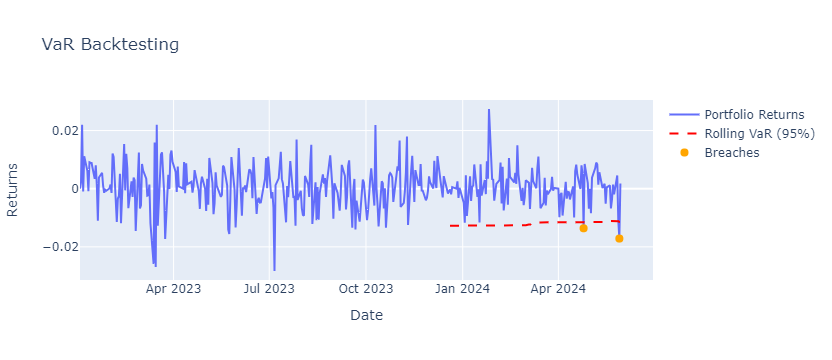

In [150]:
# Check if actual returns exceed VaR
breaches = portfolio_returns[portfolio_returns < rolling_VaR_95]

# Plot backtesting results
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_returns.index, y=portfolio_returns, mode='lines', name='Portfolio Returns'))
fig.add_trace(go.Scatter(x=rolling_VaR_95.index, y=rolling_VaR_95, mode='lines', name='Rolling VaR (95%)', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=breaches.index, y=breaches, mode='markers', name='Breaches', marker=dict(color='orange', size=8)))

fig.update_layout(title='VaR Backtesting', xaxis_title='Date', yaxis_title='Returns')
fig.show()


Interpretation:

Portfolio yield lines: As before, this curve shows daily yields.

Red line (Rolling VaR 95%): Shows rolling VaR.

Orange dots (Breaches): Points where portfolio returns are below VaR.

Usage :

VaR validation: The number of breaches tells you how often your portfolio has suffered greater losses than the VaR predicted. Ideally, this should occur around 5% of the time for a 95% VaR.

Revising the VaR model: If you see many more breaches than expected, this may mean that your VaR model is underestimating risk and may need to be adjusted.

# Monthly Value at Risk (VaR)

## Comparison with our portfolio

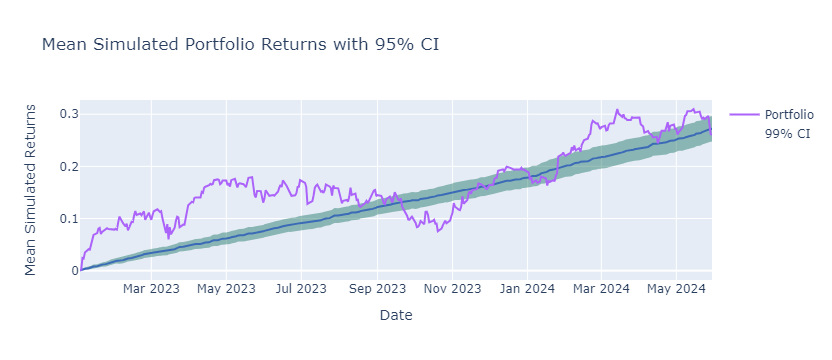

In [152]:
# Plot the mean simulated returns with confidence intervals
fig = px.line(simulated_returns_df, x='Date', y='Mean Simulated Returns', title='Mean Simulated Portfolio Returns with 95% CI')

# Add the confidence interval as a shaded area
fig.add_scatter(x=simulated_returns_df['Date'], y=simulated_returns_df['Upper Bound'], mode='lines', line=dict(width=0), fillcolor='rgba(0,100,80,0.4)', name='99% CI')
fig.add_scatter(x=simulated_returns_df['Date'], y=simulated_returns_df['Lower Bound'], mode='lines', line=dict(width=0), fill='tonexty', fillcolor='rgba(0,100,80,0.4)', showlegend=False)

fig.add_scatter(x=portfolio_value_df['Date'], y=portfolio_value_df['Portfolio Cumulative Returns'], name='Portfolio')

# Show the plot
fig.show()

## Comments

## How to improve our simulation ?